Some Imports which will be required

In [347]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

Some Random Code which you don't need to worry about

In [348]:
df_cost=pd.read_csv("lat.csv")
df_qual= pd.read_csv("movehubcostofliving.csv")

In [349]:
df_qual.sort_values('City',inplace=True,ignore_index=True)

In [350]:
df_cost.sort_values('City',inplace=True,ignore_index=True)

In [351]:
df = pd.concat([df_cost,df_qual.drop(['City'],axis=1)],axis=1)
df.columns = df.columns.str.replace(' ','_')

In [352]:
def translate(value, leftMin, leftMax, rightMin, rightMax):
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    valueScaled = float(value - leftMin) / float(leftSpan)

    return rightMin + (valueScaled * rightSpan)

In [353]:
df['Overall_Score']=0
inc_features = [ 'Movehub_Rating', 'Purchase_Power', 'Health_Care', 
       'Quality_of_Life', 'Avg_Disposable_Income']
dec_features = ['Pollution','Crime_Rating','Cappuccino', 'Cinema',
       'Wine', 'Gasoline', 'Avg_Rent']
for i in range(0,216):
  score = []
  for feat in inc_features:
    val = df[feat][i]
    var = translate(val,df[feat].min(),df[feat].max(),0,10)
    score.append(var)
  for feat in dec_features:
    val = df[feat][i]
    var = translate(val,df[feat].min(),df[feat].max(),10,0)
    score.append(var)
  df['Overall_Score'][i]= sum(score)/12


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [354]:
city_name = df['City'].tolist()

Visualising Overall City Ranking

In [355]:
features=['City', 'Movehub_Rating', 'Purchase_Power', 'Health_Care', 'Pollution',
       'Quality_of_Life', 'Crime_Rating', 'Cappuccino', 'Cinema',
       'Wine', 'Gasoline', 'Avg_Rent', 'Avg_Disposable_Income',
       'Overall_Score']
fig = px.scatter_mapbox(df,
                        lat="lat", lon="lng", color="Overall_Score", hover_name="City",
                        hover_data=features,
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                        mapbox_style="carto-positron")
fig.show()

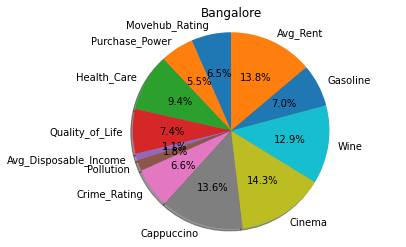

In [356]:
#@title Enter the City name whose feature contribution to Overall Score you want to Visualize
City = 'Bangalore'#@param {type:"string"}

inc_features = [ 'Movehub_Rating', 'Purchase_Power', 'Health_Care', 
       'Quality_of_Life', 'Avg_Disposable_Income']
dec_features = ['Pollution','Crime_Rating','Cappuccino', 'Cinema',
       'Wine', 'Gasoline', 'Avg_Rent']
score = []

df_pie = df[df.City == City]
for feat in inc_features:
  val = df_pie[feat]
  var = translate(val,df[feat].min(),df[feat].max(),0,10)
  score.append(var)
for feat in dec_features:
  val = df_pie[feat]
  var = translate(val,df[feat].min(),df[feat].max(),10,0)
  score.append(var)

labels = 'Movehub_Rating', 'Purchase_Power', 'Health_Care','Quality_of_Life', 'Avg_Disposable_Income','Pollution','Crime_Rating','Cappuccino', 'Cinema','Wine', 'Gasoline', 'Avg_Rent'

fig1, ax1 = plt.subplots()
ax1.pie(score,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(City)
plt.show()

Visualising Each Feature Distribution

In [357]:
#@title Enter the Feature you want to visualize
Feature= 'Pollution' #@param ['Movehub_Rating', 'Purchase_Power', 'Health_Care', 'Pollution', 'Quality_of_Life', 'Crime_Rating', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg_Rent', 'Avg_Disposable_Income']

fig = px.scatter_mapbox(df,
                        lat="lat", lon="lng", color=Feature, hover_name="City",
                        hover_data=['City',Feature],
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                        mapbox_style="carto-positron")
fig.show()

In [358]:
#@title Enter the Feature for which you want to obtain City Category
le=LabelEncoder()
df_no_city =df.drop(['City'],axis=1)
df_city = df.iloc[:,0:1]
le_city = le.fit_transform(df_city)
df_city = pd.DataFrame(le_city,columns=['LE'])
df_k_means = pd.concat([df_city,df],axis = 1)

Feature= 'Cappuccino' #@param ['Movehub_Rating', 'Purchase_Power', 'Health_Care', 'Pollution', 'Quality_of_Life', 'Crime_Rating', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg_Rent', 'Avg_Disposable_Income']

X1=df_k_means[[Feature]]
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)


kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X1)
X1=np.squeeze(X1)

features = ['Movehub_Rating', 'Purchase_Power', 'Health_Care', 'Quality_of_Life', 'Pollution', 'Crime_Rating']


df['Cluster']=pd.Series(y_kmeans)
fig = px.scatter_mapbox(df,
                        lat="lat", lon="lng", color="Cluster", hover_name="City",
                        hover_data=features,
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                        mapbox_style="carto-positron")
fig.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [359]:
#@title Enter the score you want for each parameter

movehub_rating = "78" #@param {type:"string"}
purchase_power = "1" #@param {type:"string"}
health_care = "0" #@param {type:"string"}
quality_of_life = "0" #@param {type:"string"}
pollution = "100" #@param {type:"string"}
crime_rating = "50" #@param {type:"string"}
avg_rent = "6000" #@param {type:"string"}
avg_disposable_income = "0" #@param {type:"string"}
gasoline = "2" #@param {type:"string"}
cinema = "100" #@param {type:"string"}
wine = "30" #@param {type:"string"}
cappuccino = "5" #@param {type:"string"}

df = df[(df.Movehub_Rating )>float(movehub_rating)]
df = df[(df.Purchase_Power)>float(purchase_power)]
df = df[(df.Health_Care )>float(health_care)]
df = df[(df.Pollution )<float(pollution)]
df = df[(df.Crime_Rating )<float(crime_rating)]
df = df[(df.Avg_Rent )<float(avg_rent)]
df = df[(df.Avg_Disposable_Income )>float(avg_disposable_income)]
df = df[(df.Gasoline )<float(gasoline)]
df = df[(df.Cinema )<int(cinema)]
df = df[(df.Wine )<int(wine)]
df = df[(df.Cappuccino )<int(cappuccino)]



features = df.columns
fig = px.scatter_mapbox(df,
                        lat="lat", lon="lng",  hover_name="City",
                        hover_data=features,color='Overall_Score',
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                        mapbox_style="carto-positron")
fig.show()
df.sort_values('Overall_Score',ascending=False)




,City,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,lat,lng,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Overall_Score,Cluster
0,Aachen,81.64,60.55,73.25,11.69,90.52,15.34,50.775346,6.083887,2.05,6.88,4.26,1.33,767.23,1619.72,7,0
26,Berlin,89.54,68.72,65.48,16.05,91.17,24.18,52.520007,13.404954,1.88,6.82,3.84,1.36,916.42,1772.57,7,0
189,Stuttgart,82.48,65.82,80.38,16.89,90.40,23.96,48.775846,9.182932,2.13,6.82,4.26,1.32,980.35,1943.66,7,0
152,Ottawa,87.69,91.85,66.02,33.55,86.11,22.25,45.421530,-75.697193,2.39,7.65,9.56,0.80,1020.02,2900.68,7,2
135,Montreal,89.28,66.99,66.77,6.27,78.55,31.63,45.501689,-73.567256,1.91,7.65,9.56,0.89,956.27,1785.03,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Hyderabad,79.35,39.93,63.89,89.72,54.97,36.90,17.385044,78.486671,0.72,1.81,4.83,0.91,241.35,301.69,5,1
19,Barcelona,83.37,45.68,58.47,71.75,47.18,41.47,36.088106,-95.924131,1.32,6.82,4.26,1.24,937.73,1193.48,5,1
186,Stavanger,79.41,46.59,62.48,29.13,76.50,20.83,58.969976,5.733107,4.48,10.65,13.44,1.68,2240.74,2957.77,5,3
67,Dublin,90.45,50.13,41.12,30.54,65.27,48.31,53.349805,-6.260310,2.39,8.31,8.52,1.39,1278.72,1918.09,5,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



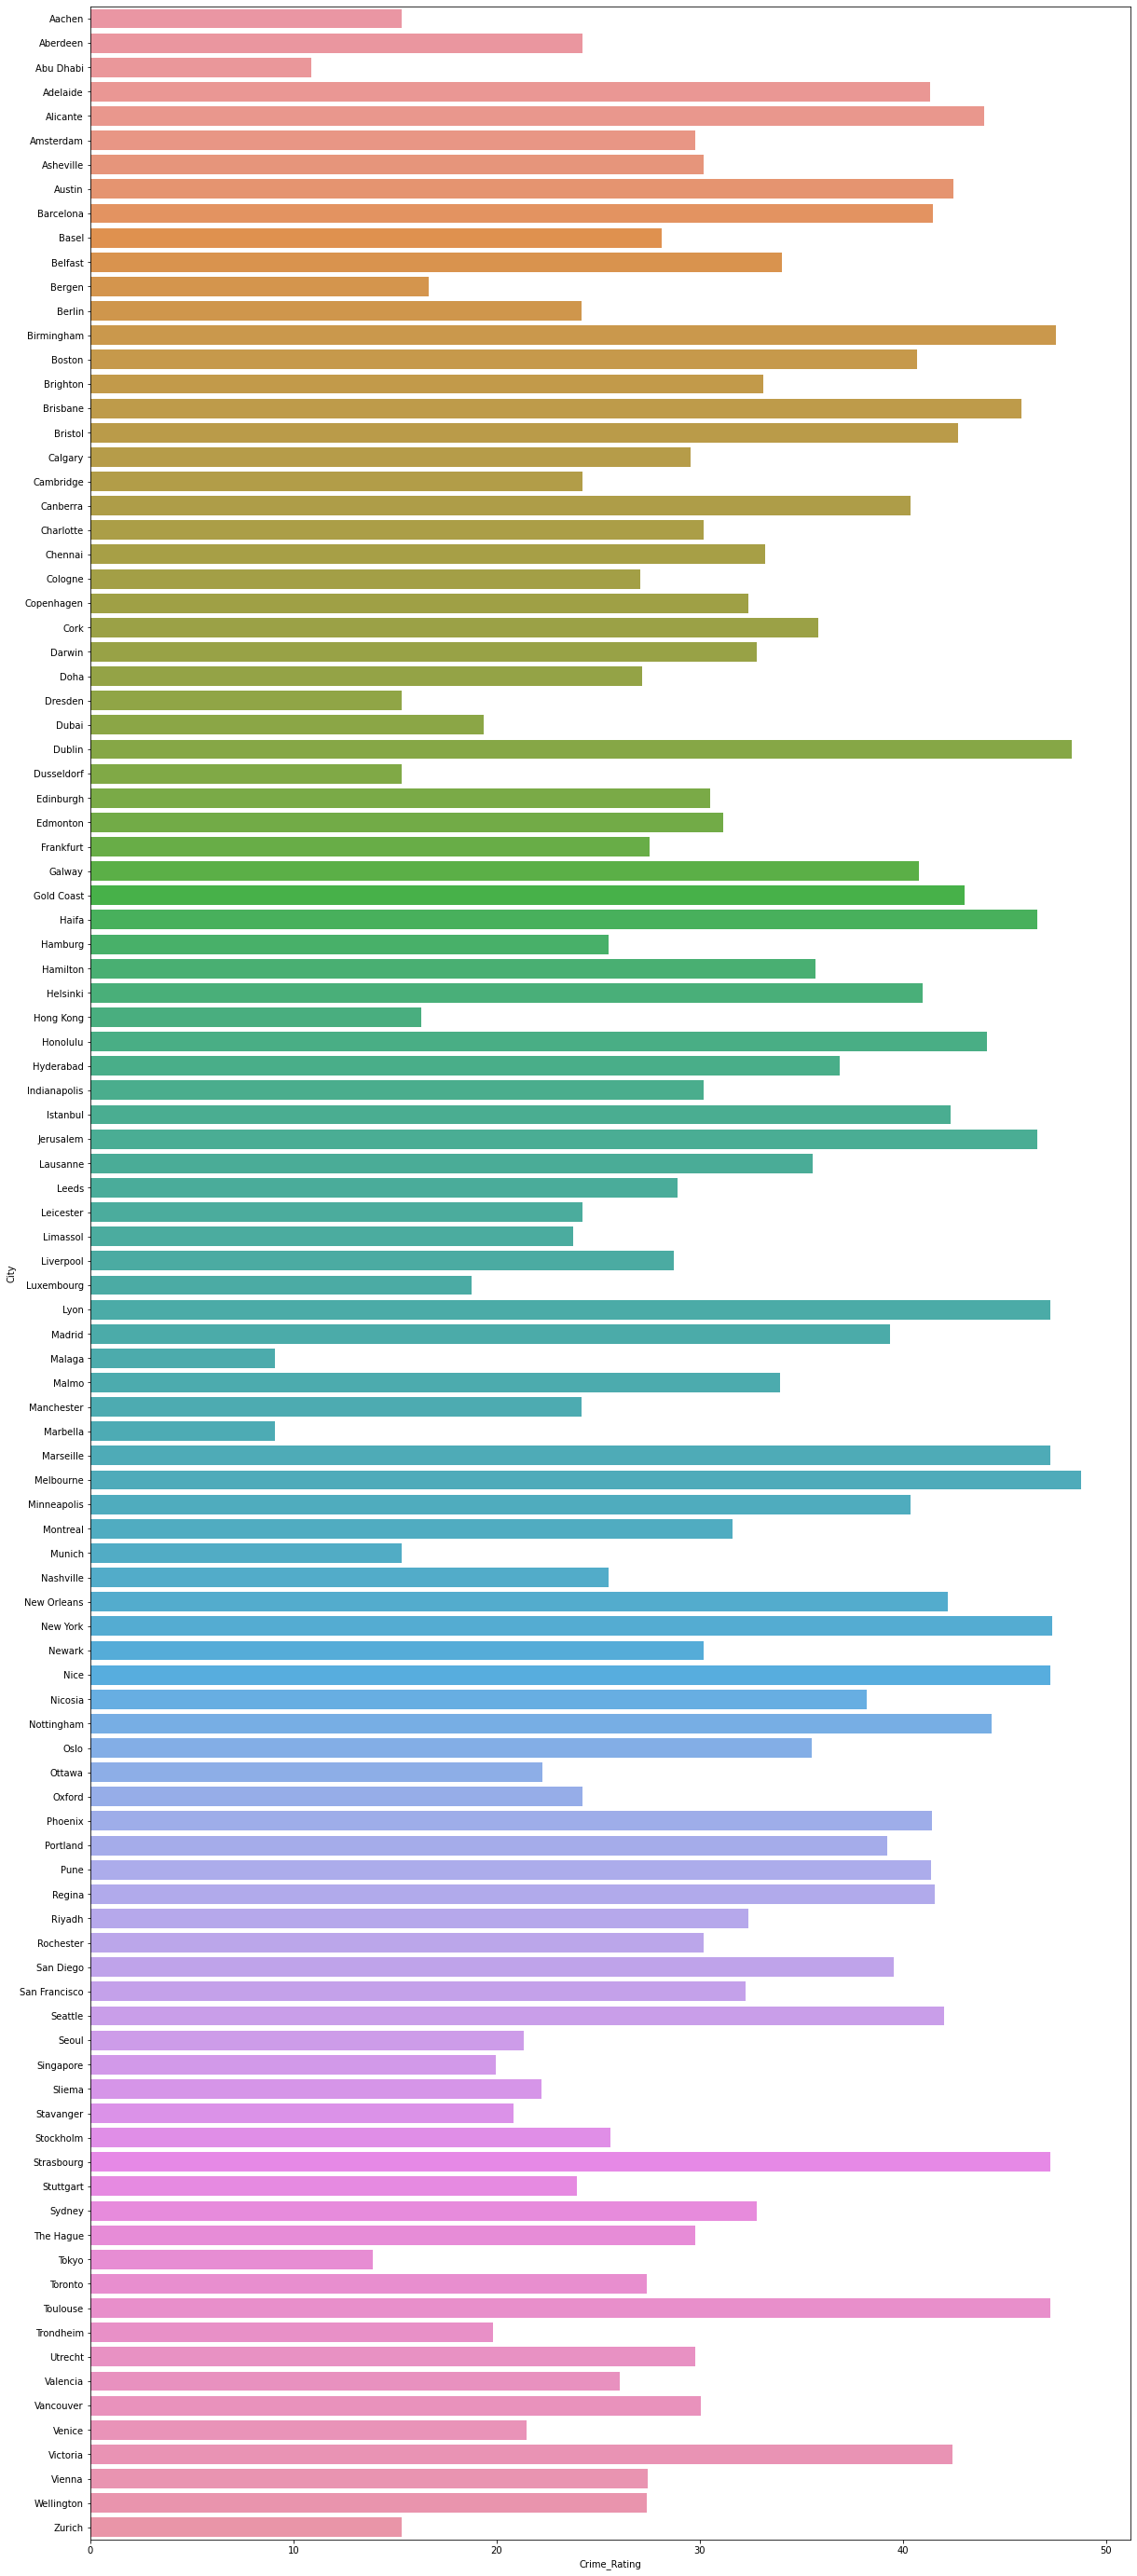

In [360]:
#@title Enter the Feature you want to compare between your shortlisted Cities
Feature= 'Crime_Rating' #@param ['Movehub_Rating', 'Purchase_Power', 'Health_Care', 'Pollution', 'Quality_of_Life', 'Crime_Rating', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg_Rent', 'Avg_Disposable_Income']

fig, ax = plt.subplots(figsize=(20,50))
sns.barplot(df[Feature],df['City'],ax=ax)